
# Task 6.6: Sourcing Analyzing Time Series Data


### Step 01 - Importing Your Libraries and Data

In [1]:
#Step 1.1: Importing Necessary Libraries; 

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from pathlib import Path
import matplotlib.dates as mdates
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')


In [2]:
#Step 1.2: Importing Dataset; 

path ='/users/ibu/Documents/Bike Rental Analysis' #Creating a Folderpath for the Dataset

quandl.ApiConfig.api_key = 'VoDpj_xHgTyKPD1qw6gn' #Configuring the 'API' Key

data = quandl.get('RATEINF/CPI_USA') #Importing the Dataframe

In [3]:
data.shape #Checking Dataframe Shape

(1321, 1)

In [4]:
data.head() #Viewing Dataframe Columns and Rows

,Value
Date,
1913-01-31,9.8
1913-02-28,9.8
1913-03-31,9.8
1913-04-30,9.8
1913-05-31,9.7


In [5]:
data.dtypes #Checking data types

Value    float64
dtype: object

In [6]:
data.columns

Index(['Value'], dtype='object')

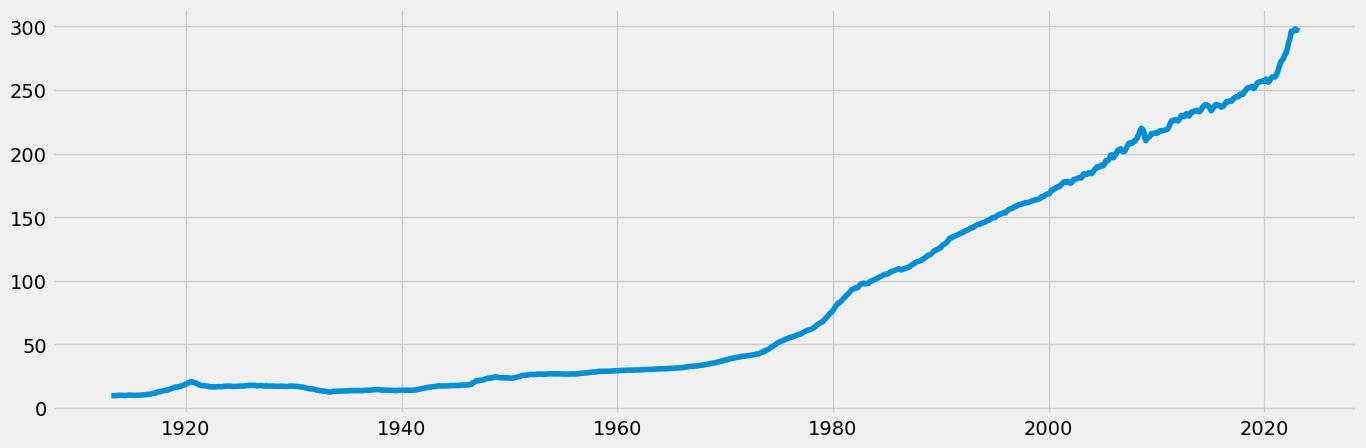

In [7]:
#Step 1.3: Plotting the Data Using Matplotlib;

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)


### Step 02 - Subsetting, Wrangling & Data Cleaning


In [8]:
#Step 2.1: Resetting Index fo 'date' Column to be Used as a Filter; 

data_2 = data.reset_index()
data_2.head()

,Date,Value
0,1913-01-31,9.8
1,1913-02-28,9.8
2,1913-03-31,9.8
3,1913-04-30,9.8
4,1913-05-31,9.7


In [9]:
#Step 2.2: Creating New Sub Set for 'Date' Indexing; 

data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01') & (data_2['Date'] < '2021-11-30')] #Creating a new data_sub

data_sub.shape #Checking dataframe shape

(502, 2)

In [10]:
data_sub.head() #Checking dataframe columns

,Date,Value
804,1980-01-31,77.8
805,1980-02-29,78.9
806,1980-03-31,80.1
807,1980-04-30,81.0
808,1980-05-31,81.8


In [11]:
data_sub.columns

Index(['Date', 'Value'], dtype='object')

In [12]:
#Step 2.3: Setting 'Date' Column as the Index

from datetime import datetime

data_sub['Datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('Datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
Datetime,
1980-01-31,77.8
1980-02-29,78.9
1980-03-31,80.1
1980-04-30,81.0
1980-05-31,81.8


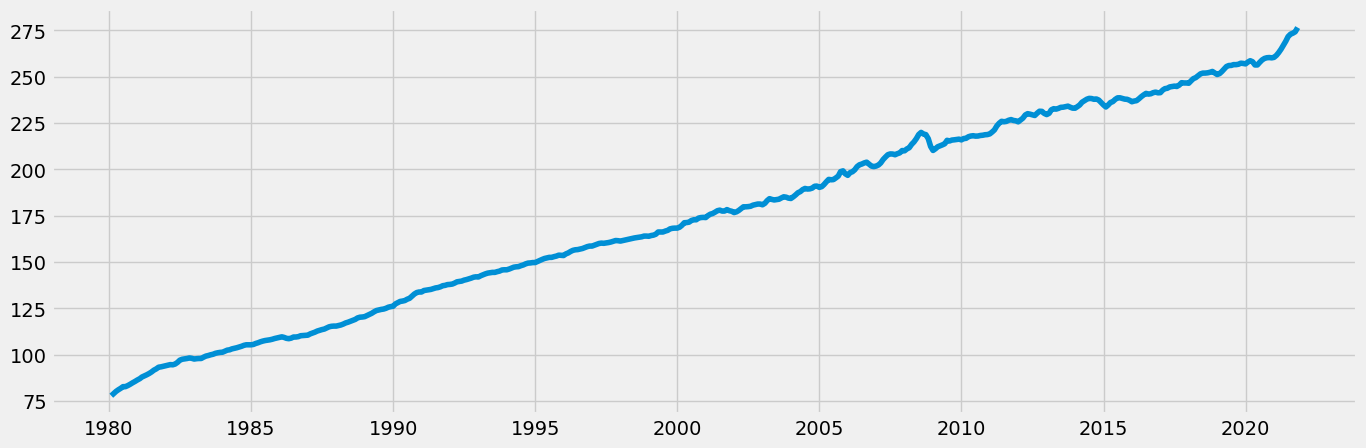

In [13]:
#Step 2.4: Plotting the Data Using Matplotlib;

plt.figure(figsize=(15,5), dpi=100) #The dpi argument controls the quality of the visualization here. When it's set to 100,

plt.plot(data_sub)

In [14]:
#Step 2.5: Data Cleaning; 

data_sub.isnull().sum() #Checking for Missing Values

Value    0
dtype: int64

In [15]:
data_dups = data_sub.duplicated() #Checking for Duplicates; 

data_dups.sum()

29


### Step 03 - Time-Series Analysis: Decomposition


In [16]:
#Step 3.1: Decomposing Time-Series Using an Additive Model;

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [17]:
#Step 3.2: Importing pylab;

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

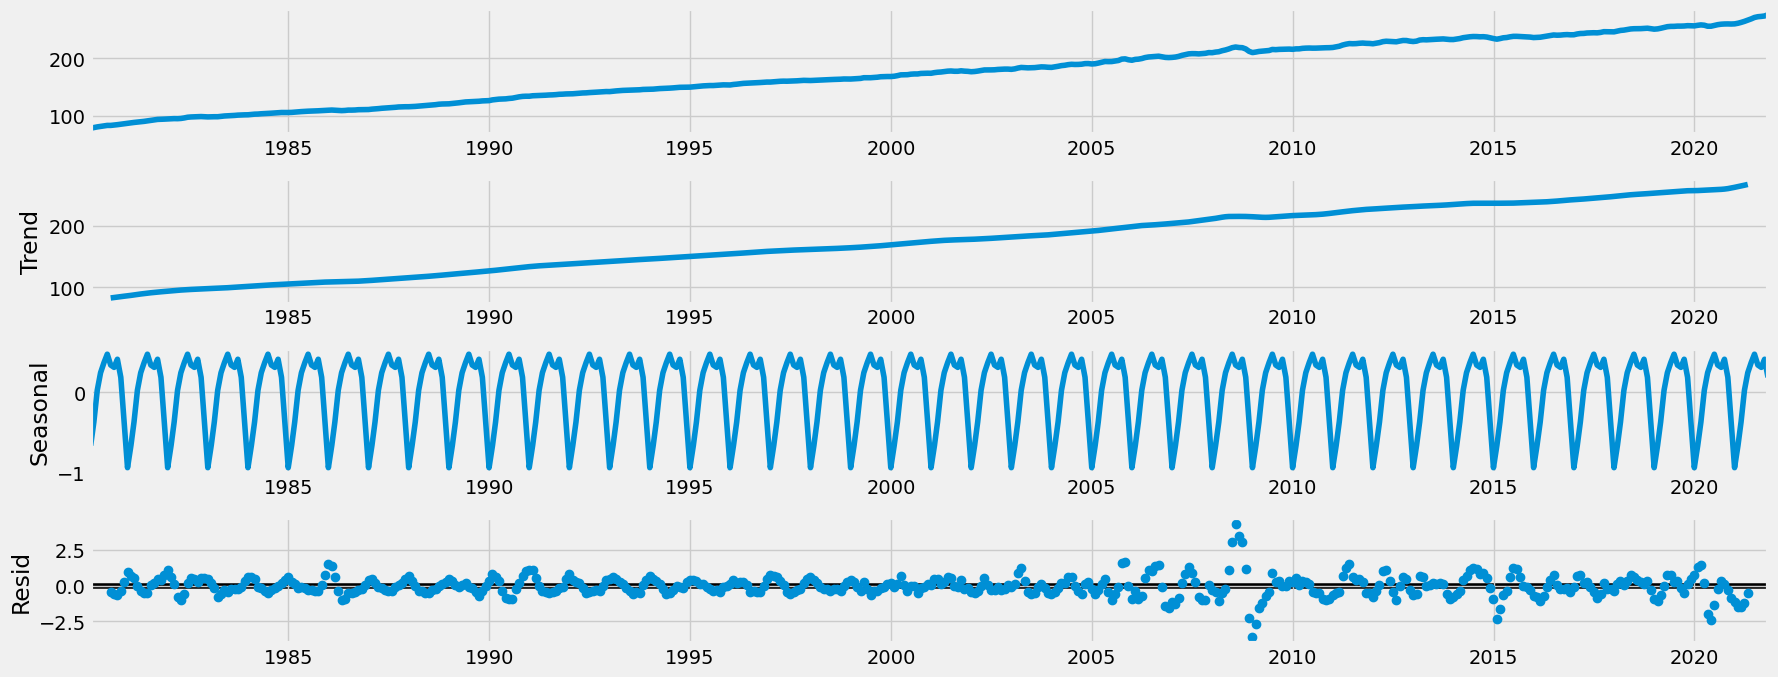

In [18]:
#Step 3.3: Plotting the Separate Components; 

decomposition.plot()
plt.show()

### Notes: 

<b>1. There is an upward-downward patterns under seasonality 

<b>2. The trend lines highlight slighlty in upward direction as years goes by. Everything else held constant, we can see a gradual rise in pricing pattern over rtime.


### Step 04 - Testing for Stationarity


In [19]:
#Step 4.1: Stationarity Test; 

# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [20]:
dickey_fuller(data_sub['Value']) #Applying the test using the function on the time series

Dickey-Fuller Stationarity test:
Test Statistic                   0.937018
p-value                          0.993555
Number of Lags Used             13.000000
Number of Observations Used    488.000000
Critical Value (1%)             -3.443821
Critical Value (5%)             -2.867481
Critical Value (10%)            -2.569934
dtype: float64


## We cannot reject the null hypothesis because the Test Statistic (0.93) is larger than the Critical Value of -2.87 at 5%. 

## Means the data is non-stationary


### Guides: 

#### Test statistic larger than critical value = can't reject null hypothesis

#### Test statistics smaller than critical value = can reject null hypothesis

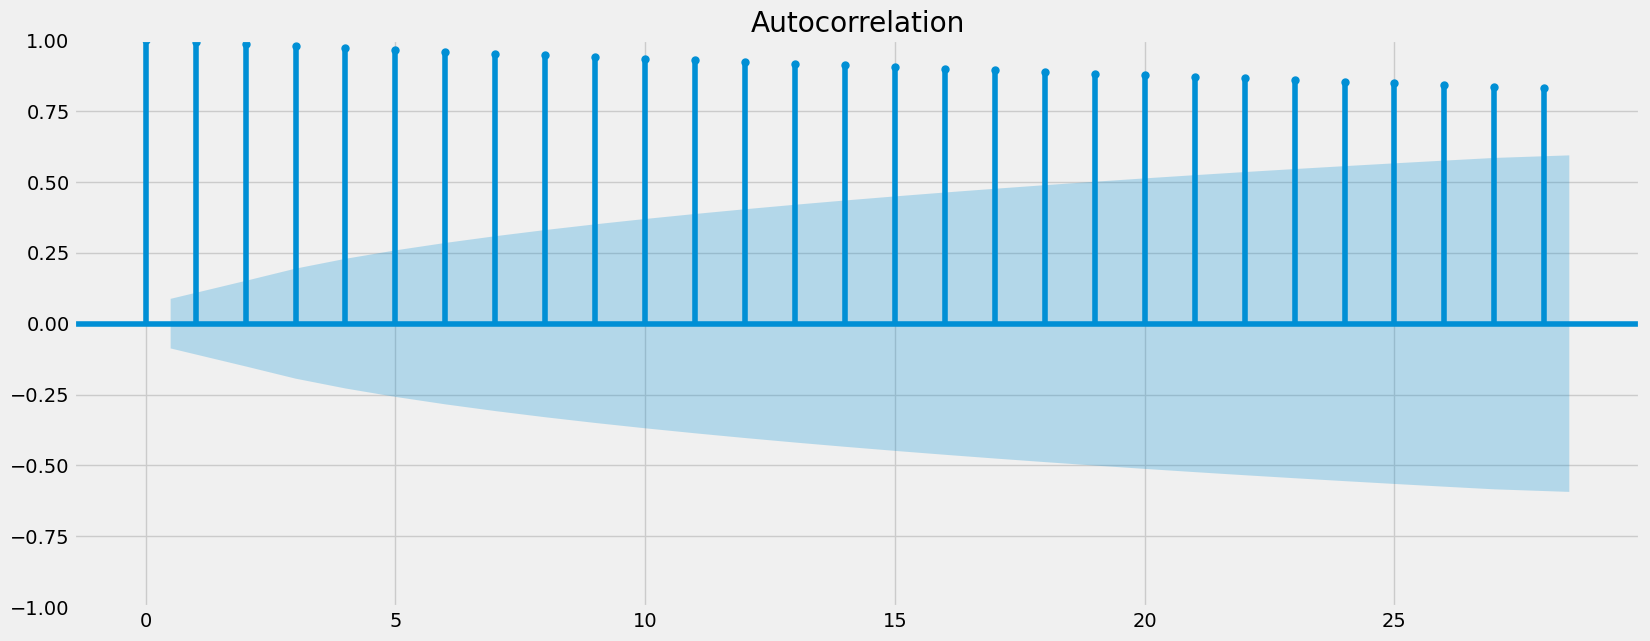

In [21]:
#Step 4.2: Checking Out a Plot of Auto-Correlations;

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()


### Step 05 - Stationarizing Time Series Data


In [22]:
#Step 5.1: Differencing Time Series into New Time Series; 

data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [23]:
data_diff.columns

Index(['Value'], dtype='object')

In [26]:
data_diff.dropna(inplace = True) #Removing all missing values to run the Dickey-Fuller test

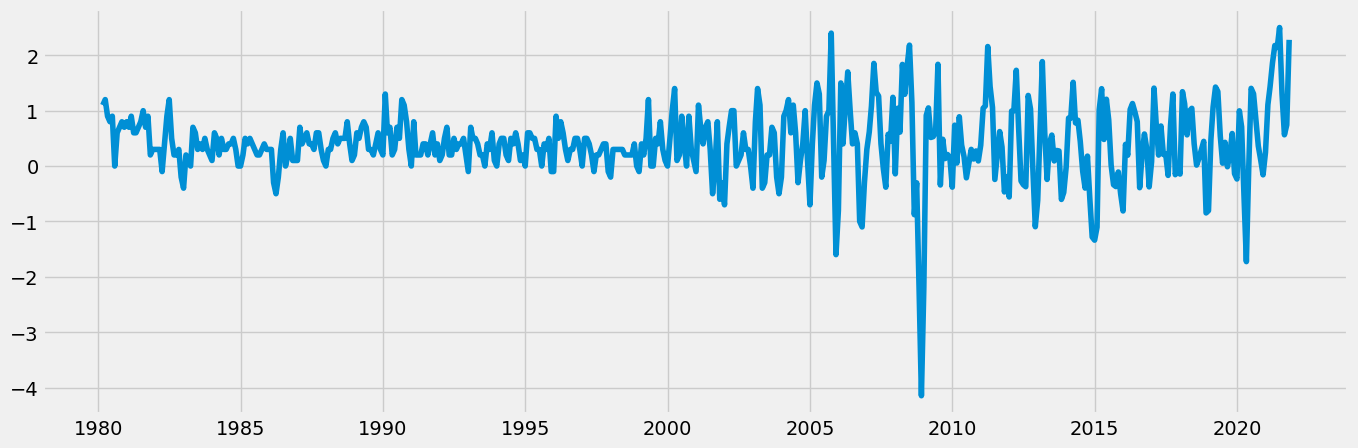

In [27]:
#Step 5.2: Checking Out What the Differencing Did to the Time-Series Curve;

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
#Step 5.3: Performing Dickey-Fuller Test; 

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.648276
p-value                          0.000105
Number of Lags Used             12.000000
Number of Observations Used    488.000000
Critical Value (1%)             -3.443821
Critical Value (5%)             -2.867481
Critical Value (10%)            -2.569934
dtype: float64


## The Hypothesis can now be rejected because the Test Statistic (-4.65) is much smaller than the Critical Value of -2.87 at both 5% and 10% levels. 

## Now data is considered as stationary.

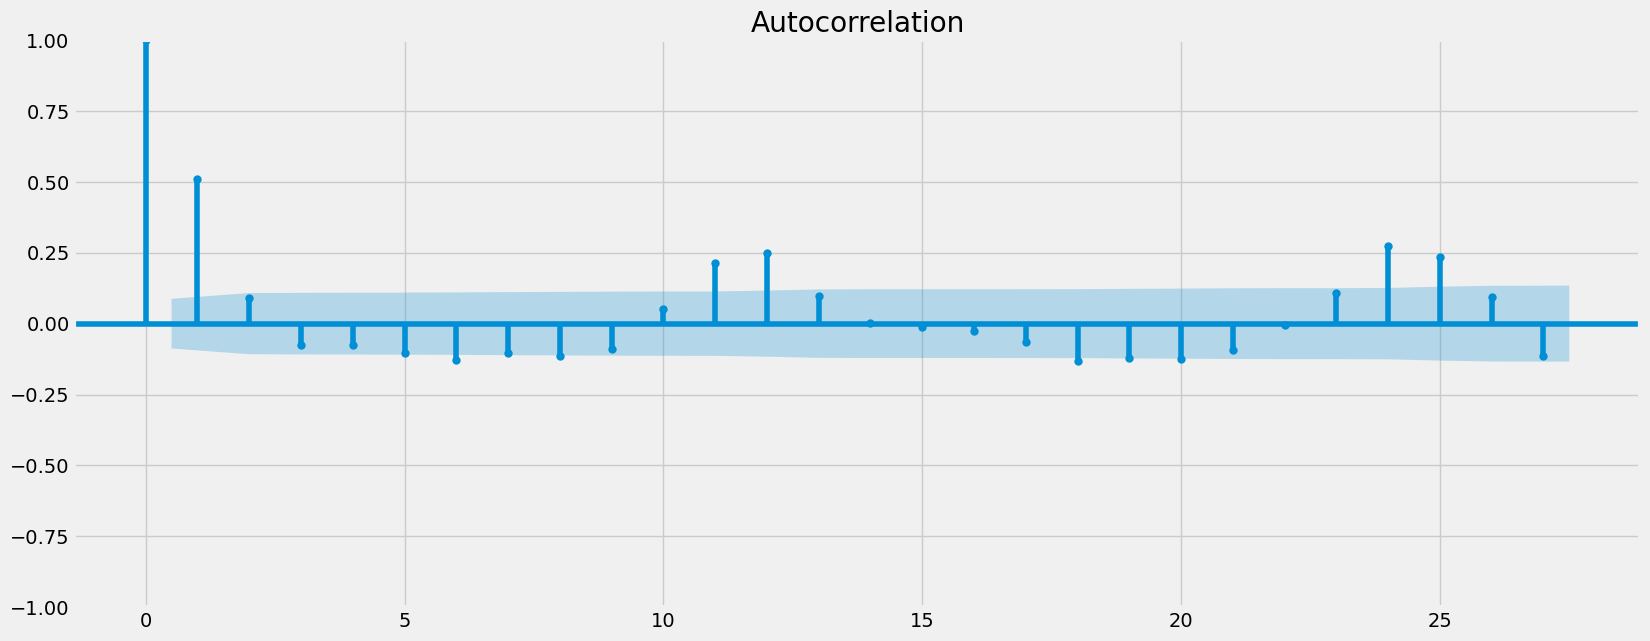

In [29]:
#Step 5.4: Checking Out on Auto-Correlations Plot;

plot_acf(data_diff)
plt.show()

## Notes: 

### 01. The Auto-Correlation plot highlighted an improvement with about 6 autocorrelated lags above the confidence interval. 

### 02. Current 'weak stationarity' outcome is acceptable as a second differencing-run requires at least 10 significant lags above the confidence level. 
